Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import os
import random

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image display
import cv2
from PIL import Image


Loading the Dataset

In [3]:
# Define paths
train_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\train'
val_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\validation'


In [4]:
# Creating Image Data-Generators
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [5]:
# Loading images from the train folder
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)


Found 28821 images belonging to 7 classes.


In [6]:
# Loading images from the validation folder
val_data = val_gen.flow_from_directory(
    val_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

Found 7066 images belonging to 7 classes.


Dataset overview

In [7]:
# Set path to your train directory
train_dir = r"C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\train"

# Loop through each emotion folder
for emotion in os.listdir(train_dir):
    emotion_path = os.path.join(train_dir, emotion)
    image_file = os.listdir(emotion_path)[0]  # take first image
    image_path = os.path.join(emotion_path, image_file)

    # Read image using OpenCV
    img = cv2.imread(image_path)

    if img is not None:
        height, width, channels = img.shape
        file_size_kb = os.path.getsize(image_path) / 1024

        print(f"Emotion: {emotion}")
        print(f"Image: {image_file}")
        print(f"Dimensions: {width} x {height}")
        print(f"Channels: {channels} ({'Grayscale' if channels == 1 else 'RGB'})")
        print(f"File Size: {file_size_kb:.2f} KB")
        print("-" * 40)


Emotion: angry
Image: 0.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.49 KB
----------------------------------------
Emotion: disgust
Image: 10018.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.52 KB
----------------------------------------
Emotion: fear
Image: 10010.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.40 KB
----------------------------------------
Emotion: happy
Image: 100.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.33 KB
----------------------------------------
Emotion: neutral
Image: 1000.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.62 KB
----------------------------------------
Emotion: sad
Image: 10006.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.46 KB
----------------------------------------
Emotion: surprise
Image: 10007.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.44 KB
----------------------------------------


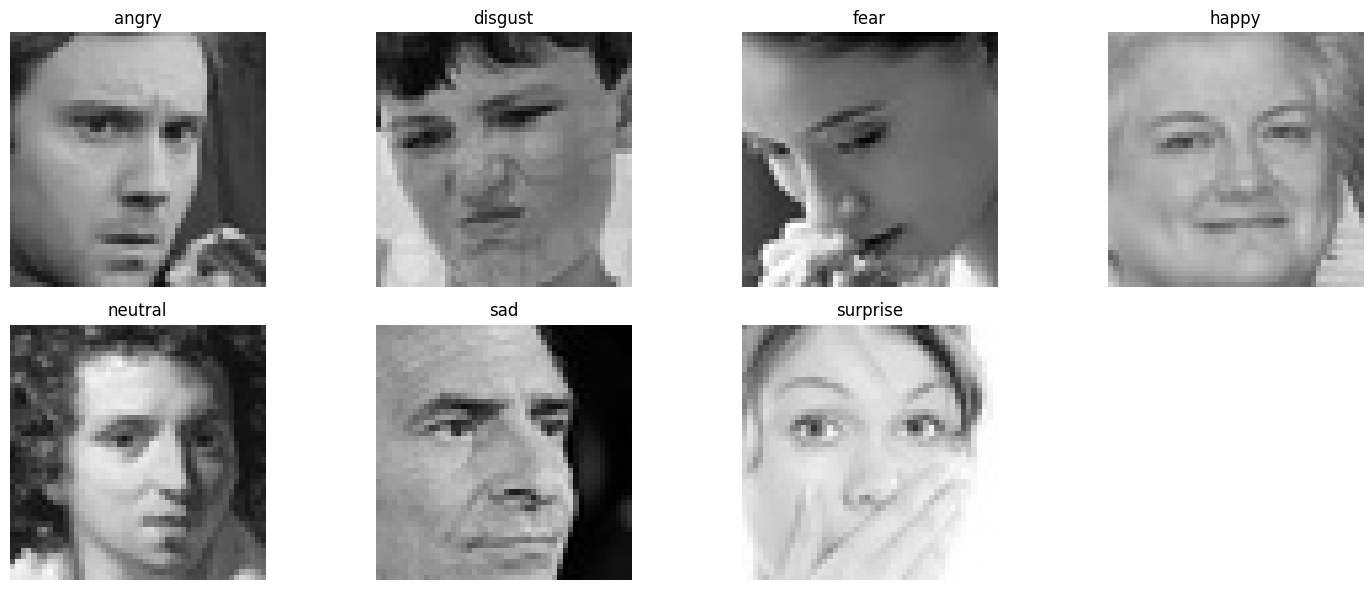

In [8]:
# Get the 7 emotion folder names
emotion_classes = os.listdir(train_dir)

# Plot one image from each folder
plt.figure(figsize=(15, 6))

for idx, emotion in enumerate(emotion_classes):
    emotion_path = os.path.join(train_dir, emotion)
    image_name = os.listdir(emotion_path)[0]  # first image
    image_path = os.path.join(emotion_path, image_name)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB

    plt.subplot(2, 4, idx + 1)
    plt.imshow(img)
    plt.title(emotion)
    plt.axis('off')

plt.tight_layout()
plt.show()


Model Building

In [19]:
from tensorflow.keras.layers import Input

# Build the model
model = Sequential()

# Input shape updated to (48, 48, 1) for grayscale
model.add(Input(shape=(48, 48, 1)))

# 1st Convolution Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# 2nd Convolution Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# 3rd Convolution Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# 4th Convolution Block (optional for depth)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer: 7 classes (one for each emotion)
model.add(Dense(7, activation='softmax'))



In [20]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
# Model Summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 423,559 (1.62 MB)

 Trainable params: 422,599 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

Training of model


In [22]:
# Train the model
history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data
)


Epoch 1/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 505s 557ms/step - accuracy: 0.1962 - loss: 2.6087 - val_accuracy: 0.3225 - val_loss: 1.7874
Epoch 2/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.2669 - loss: 1.8174 - val_accuracy: 0.3886 - val_loss: 1.6030
Epoch 3/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.3195 - loss: 1.7185 - val_accuracy: 0.3981 - val_loss: 1.5690
Epoch 4/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.3620 - loss: 1.6265 - val_accuracy: 0.4333 - val_loss: 1.4955
Epoch 5/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.3802 - loss: 1.5859 - val_accuracy: 0.4509 - val_loss: 1.4564
Epoch 6/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.3936 - loss: 1.5439 - val_accuracy: 0.4731 - val_loss: 1.4019
Epoch 7/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4233 - loss: 1.4946 - val_accuracy: 0.4904 - val_loss: 1.3577
Epoch 8/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.4346 - loss: 1.4651 

In [23]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


221/221 ━━━━━━━━━━━━━━━━━━━━ 88s 396ms/step - accuracy: 0.5833 - loss: 1.1149
Validation Accuracy: 0.5900
Validation Loss: 1.0953


Hyperparameter tuning

In [25]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt


In [27]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(48, 48, 1)))

    # Conv Layer 1
    model.add(Conv2D(filters=hp.Choice('conv1_filters', [32, 64]),
                     kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())

    # Conv Layer 2
    model.add(Conv2D(filters=hp.Choice('conv2_filters', [64, 128]),
                     kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1)))

    # Conv Layer 3
    model.add(Conv2D(filters=hp.Choice('conv3_filters', [128, 256]),
                     kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(hp.Float('dropout2', 0.3, 0.5, step=0.1)))

    # FC Layer
    model.add(Flatten())
    model.add(Dense(units=hp.Choice('dense_units', [64, 128]), activation='relu'))
    model.add(Dropout(hp.Float('dropout3', 0.4, 0.6, step=0.1)))

    model.add(Dense(7, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [28]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='tuner_logs',
    project_name='emotion_cnn'
)


In [29]:
tuner.search(train_data, epochs=25, validation_data=val_data)


Trial 3 Complete [00h 33m 15s]
val_accuracy: 0.5785451531410217

Best val_accuracy So Far: 0.5960939526557922
Total elapsed time: 01h 27m 10s


In [31]:
best_model = tuner.get_best_models(1)[0]
val_loss, val_acc = best_model.evaluate(val_data)
print(f"Best Model - Val Accuracy: {val_acc:.4f}")


C:\Users\Umeru\anaconda3\envs\facial_emotion_recognition\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5955 - loss: 1.1243
Best Model - Val Accuracy: 0.5961


In [32]:
best_model.save("facial_emotion_model.keras")


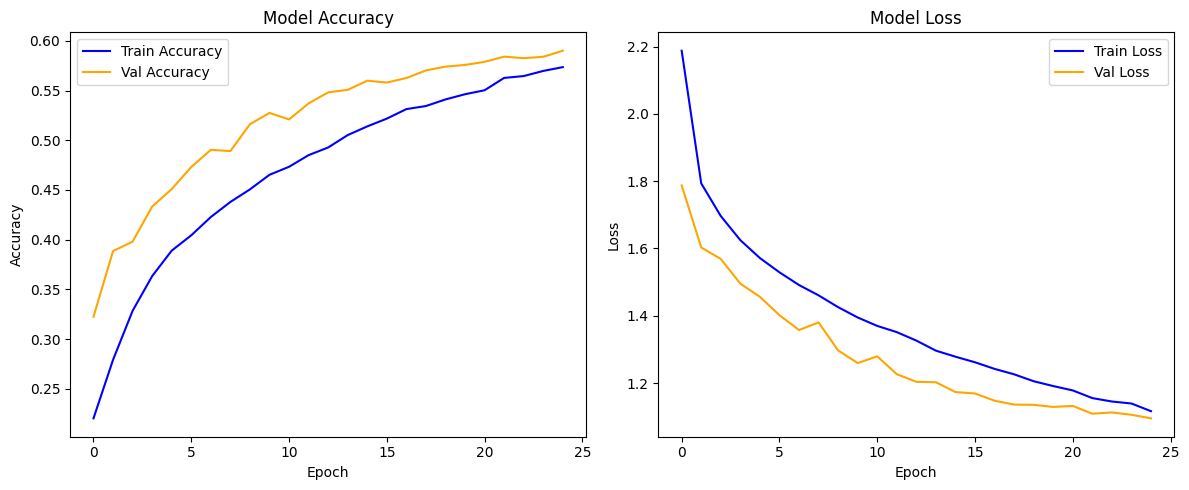

In [33]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# Emotion labels (must match your class order)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Path to your validation folder
val_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\validation'


Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


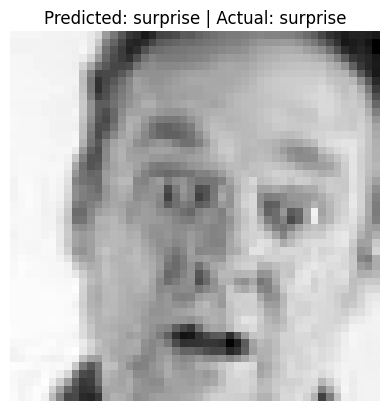

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


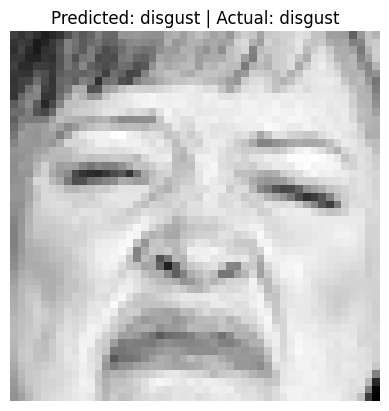

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


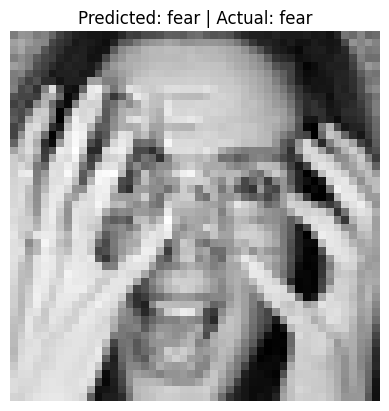

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


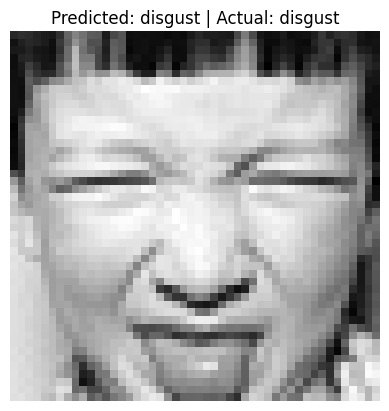

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


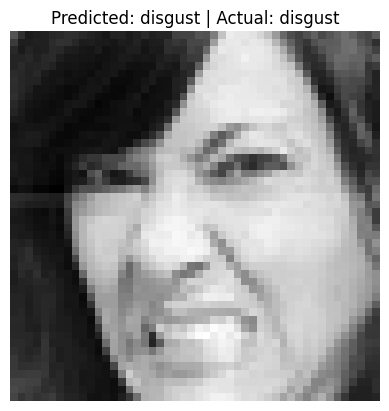

In [41]:
from tensorflow.keras.preprocessing import image

# Pick 5 random images from validation subfolders
for i in range(5):
    class_folder = random.choice(os.listdir(val_path))
    class_path = os.path.join(val_path, class_folder)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # (1, 48, 48, 1)

    # Predict
    prediction = best_model.predict(img_array)
    predicted_label = emotion_labels[np.argmax(prediction)]

    # Show image and prediction
    plt.imshow(img_array[0].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_label} | Actual: {class_folder}")
    plt.axis('off')
    plt.show()
